In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip' &> /dev/null

In [ ]:
from PIL import Image as I
from PIL import ImageFilter
import pandas as pd
import numpy as np
import os
from collections import Counter
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix as cm
from distutils.file_util import copy_file
import random
np.set_printoptions(suppress=True)

In [ ]:
non = '/content/Data/Non Demented'
vmild = '/content/Data/Very mild Dementia'
mild = '/content/Data/Mild Dementia'
mod = '/content/Data/Moderate Dementia'

In [ ]:
listmod = []
listnon = []
listvmild = []
listmild = []

for root, directories, files in os.walk(mod):
    for name in files:
        listmod.append(os.path.join(root, name))
for root, directories, files in os.walk(non):
    for name in files:
        listnon.append(os.path.join(root, name))
for root, directories, files in os.walk(vmild):
    for name in files:
        listvmild.append(os.path.join(root, name))
for root, directories, files in os.walk(mild):
    for name in files:
        listmild.append(os.path.join(root, name))

seed_value = 0
random.seed(seed_value)
random.shuffle(listmod)
random.shuffle(listnon)
random.shuffle(listvmild)
random.shuffle(listmild)

!mkdir ./Newdata
!mkdir ./Newdata/alz
!mkdir ./Newdata/notalz

In [ ]:
alz = '/content/Newdata/alz'
notalz = '/content/Newdata/notalz'
n=488
m=162
for i in range(n):
    copy_file(listnon[i], notalz)
for i in range(m):
    copy_file(listvmild[i], alz)
    copy_file(listmild[i], alz)
    copy_file(listmod[i], alz)

In [ ]:
dir = [alz,notalz]
main_image_list = []
labels = []

for i in range(2):
    location = sorted( os.listdir( dir[i] ) )
    image_list = []
    label_list = []
    for file_name in location:
        file_path = os.path.join( dir[i] , file_name )
        image = I.open(file_path)
        new_image = image.convert('L').resize(( 128,64))
        image2D = np.array(new_image)
        image1D = image2D.flatten()
        image_list.append(image1D)
        label_list.append(i)

    concatenated_images = np.vstack(image_list)
    concatenated_labels = np.vstack(label_list)
    print(concatenated_images.shape)
    main_image_list.append(concatenated_images)
    labels.append(concatenated_labels)

(486, 8192)
(488, 8192)


In [ ]:
main_image_list = np.vstack(main_image_list)

In [ ]:
labels = np.vstack(labels)

In [ ]:
data = np.concatenate((labels, main_image_list), axis=1)
df = pd.DataFrame(data)

In [ ]:
random_seed = 0
S_df = df.sample(frac=1, random_state = random_seed)

In [ ]:
train_df, test_df = split(S_df, test_size= 1/3, random_state=0)

In [ ]:
n_df = train_df.iloc[:,:1].values

In [ ]:
p_df = train_df.iloc[:,1:].values

In [ ]:
n_df_t = test_df.iloc[:,:1].values

In [ ]:
p_df_t = test_df.iloc[:,1:].values

In [ ]:
X_train = p_df
Y_train = n_df
X_test = p_df_t
Y_test = n_df_t

In [ ]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [ ]:
f = X_train.shape[1]
w = np.random.uniform(-1e-4, 1e-4, f)

In [ ]:
for epoch in range(1000):
  z_train = X_train@ w
  y_pred_train = 1 / (1 + np.exp(-(z_train)))

  grad = X_train.T @ (y_pred_train - Y_train)/len(Y_train)
  w = w - 0.01*grad

  z_test = X_test@w
  y_pred_test = 1 / (1 + np.exp(-(z_test)))

In [ ]:
threshold = 0.5
pred = (y_pred_test >= threshold).astype(int)

In [ ]:
np.mean(Y_test == pred)

0.7507692307692307

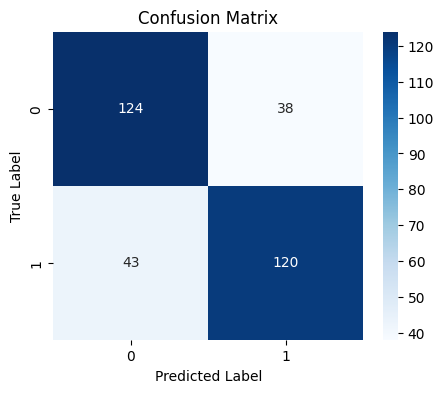

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm1 = cm(Y_test, pred)

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()